# 크롤링 실습

## 크롤링 실습을 위한 준비

In [ ]:
!pip3 install requests
!pip3 install bs4
!pip3 install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.7 MB/s 
     |████████████████████████████████| 358 kB 37.0 MB/s 
     |████████████████████████████████| 139 kB 25.1 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 4.1 MB 46.1 MB/s 
     |████████████████████████████████| 58 kB 5.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires u

## GET 요청하기

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


<Response [200]>


'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="제주도 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'제주도\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'제주도\'의 네이버 통합검색 결과입니다."> <title>제주도 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220728.css"> <link rel="stylesheet" type="text/css" href
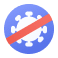
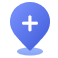
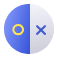
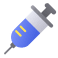

In [ ]:
import requests

url = 'https://search.naver.com/search.naver?ie=UTF-8&query=%EC%A0%9C%EC%A3%BC%EB%8F%84&sm=chr_hty'
res = requests.get(url)

print(res) # 응답 객체
res.text # HTML 텍스트

#### HTTP 상태 코드
 - 1xx (정보): 요청을 받았으며 프로세스를 계속한다
 - 2xx (성공): 요청을 성공적으로 받았으며 인식했고 수용하였다
 - 3xx (리다이렉션): 요청 완료를 위해 추가 작업 조치가 필요하다
 - 4xx (클라이언트 오류): 요청의 문법이 잘못되었거나 요청을 처리할 수 없다
 - 5xx (서버 오류): 서버가 명백히 유효한 요청에 대해 충족을 실패했다

[출처: 위키피디아](https://ko.wikipedia.org/wiki/HTTP_%EC%83%81%ED%83%9C_%EC%BD%94%EB%93%9C)

In [ ]:
res.status_code # HTTP 상태 코드 

200

## BeautifulSoup을 이용한 크롤링

In [ ]:
# 임시 html 텍스트
html = '''
<html>
  <head>
    <title>Example HTML</title>
  </head>
  <body>
    <div id='first' class='Example'>
      <h3 title='Good Content Title'>Contents Title</h3>
      <p>Test contents</p>
    </div>
    <div id='second' class='Example'>
      <p>Text1</p>
      <p>Text2</p>
      <p>Text3</p>
    </div>
  </body>
</html>
'''

In [ ]:
from bs4 import BeautifulSoup

# 첫 번째 인자: 파싱할 객체
# 두 번째 인자: 사용할 parser(구문 분석기)
soup = BeautifulSoup(html, 'html.parser') 

find(), find_all()

태그 검색   
- find(tag, attributes, recursive, text, keywords)   
- find_all(tag, attributes, recursive, text, limit, keywords)   

get_text()

태그 내 텍스트 반환(부모 태그의 경우 자식 태그의 텍스트를 모두 반환)

In [ ]:
tag = soup.find('h3')
print(tag)
tag.get_text()

<h3 title="Good Content Title">Contents Title</h3>


'Contents Title'

In [ ]:
tag = soup.find('p')
print(tag)
tag.get_text()

<p>Test contents</p>


'Test contents'

In [ ]:
# find_all은 list 형태로 값 반환
soup.find_all('p')

[<p>Test contents</p>, <p>Text1</p>, <p>Text2</p>, <p>Text3</p>]

In [ ]:
soup.find_all('p')[2].get_text()

'Text2'

In [ ]:
# 개수 제한
soup.find_all('p', limit=2)

[<p>Test contents</p>, <p>Text1</p>]

In [ ]:
# 여러 태그
soup.find_all({'p', 'h3'})

[<h3 title="Good Content Title">Contents Title</h3>,
 <p>Test contents</p>,
 <p>Text1</p>,
 <p>Text2</p>,
 <p>Text3</p>]

In [ ]:
soup.find('div')

<div class="Example" id="first">
<h3 title="Good Content Title">Contents Title</h3>
<p>Test contents</p>
</div>

In [ ]:
soup.find('div').get_text().replace('\n', '')

'Contents TitleTest contents'

In [ ]:
# 특정 속성을 가진 태그 검색
soup.find('div', {'id': 'second'})

<div class="Example" id="second">
<p>Text1</p>
<p>Text2</p>
<p>Text3</p>
</div>

In [ ]:
# keyword 매개변수 이용
soup.find('div', id='second')

<div class="Example" id="second">
<p>Text1</p>
<p>Text2</p>
<p>Text3</p>
</div>

In [ ]:
soup.find('div', id='second', class_='Example')

<div class="Example" id="second">
<p>Text1</p>
<p>Text2</p>
<p>Text3</p>
</div>

In [ ]:
# 속성이 여러 개일 경우
attrs = {
    'id': 'second',
    'class': 'Example'
}
soup.find('div', attrs)

<div class="Example" id="second">
<p>Text1</p>
<p>Text2</p>
<p>Text3</p>
</div>

네이버 금융 주요뉴스 헤드라인 크롤링 예시

In [ ]:
url = "https://finance.naver.com/"
res = requests.get(url)

# 첫번째 인자를 텍스트로 넣어줘야 함
soup = BeautifulSoup(res.text, 'html.parser')

# 주요뉴스 섹션 검색
strategy = soup.find('div', class_="section_strategy")

# 주요뉴스 헤드라인을 저장할 리스트
strategies = []

# 주요뉴스에 있는 헤드라인 텍스트 정보 추출한 뒤 리스트에 저장
for i in range(len(strategy.find_all('a'))-1):
  strategies.append(strategy.find_all('a')[i].get_text())

# 결과 확인
for headline in strategies:
  print(headline)


[Asia마감] 美증시 훈풍타고 올랐지만…대만은 하락
[마켓뷰] ‘돌아온 외국인’ 6거래일 연속 순매수…코스피 2470선 회복
[유럽개장] 장 초반 혼조세…英 0.14%↓
[시황종합] 코스피, 외인 매수에 2470선 안착…카카오 7.5%↑
[마감시황]코스피, 펠로시 방한에…2480선 턱밑까지 상승
[외환마감]中 대만해협서 군사 위협, 위안 약세…환율, 1310원대 약보합


## Selenium을 이용한 크롤링

In [ ]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [87.8 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [901 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bioni

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

chrome_options = webdriver.ChromeOptions()

chrome_options.add_argument('--headless') #내부 창을 띄울 수 없으므로 설정

chrome_options.add_argument('--no-sandbox')

chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]


In [ ]:
'''
# webdriver에 옵션 적용 가능
options = webdriver.ChromeOptions()

# 브라우저 창이 안뜨고 실행
options.add_argument('headless')
# 브라우저 사이즈 설정
options.add_argument('window-size=1920x1080')

# 옵션 적용
driver = webdriver.Chrome(path, options=options)
'''

"\n# webdriver에 옵션 적용 가능\noptions = webdriver.ChromeOptions()\n\n# 브라우저 창이 안뜨고 실행\noptions.add_argument('headless')\n# 브라우저 사이즈 설정\noptions.add_argument('window-size=1920x1080')\n\n# 옵션 적용\ndriver = webdriver.Chrome(path, options=options)\n"

In [ ]:
driver.get('https://www.naver.com/')

# id 속성으로 검색창 찾기
search = driver.find_element(By.ID , 'query')

# 검색어 입력
search.send_keys('제주도')
# Keys.RETURN = Enter 입력
search.send_keys(Keys.RETURN)


# a 태그의 텍스트로 찾기
search = driver.find_element(By.LINK_TEXT,'이미지')
# 클릭
search.click()

\* 셀레니움 사용 시 브라우저에서 해당 웹 페이지의 요소들을 로드하는 데 시간이 좀 걸리기 때문에, element가 존재하지 않는다는 error가 발생할 수 있다.   
그럴 경우 해당 요소가 전부 준비가 될 때까지 대기해야 한다.

```python
driver.implicitly_wait(time_to_wait=5)
```
-> 찾으려는 element가 로드될 때까지 지정한 시간만큼 대기할 수 있도록 설정   
위 방법은 암시적 대기 방식으로, webdriver에 영구적으로 작용된다.   
time_to_wait=5: 5초까지 기다림

https://workingwithpython.com/selenium-waits/

네이버 금융 주요뉴스 헤드라인 크롤링 

In [ ]:
driver.get('https://finance.naver.com/')

all_title=[]

for i in range(1,7):
    # css 선택자로 찾기
    # 크롬 개발자 도구에서 copy selector를 이용하면 편함
    css = '#content > div.article > div.section > div.news_area > div > ul > li:nth-child(' + str(i) + ') > span > a'
    #content > div.article > div.section > div.news_area > div > ul > li:nth-child(1) > span > a
    #content > div.article > div.section > div.news_area > div > ul > li:nth-child(2) > span > a
    content = driver.find_element(By.CSS_SELECTOR, css)
    all_title.append(content.text)
    print(all_title[i-1])

print(all_title)

[마켓뷰] ‘돌아온 외국인’ 6거래일 연속 순매수…코스피 2470선 회복
[유럽개장] 장 초반 혼조세…英 0.14%↓
[시황종합] 코스피, 외인 매수에 2470선 안착…카카오 7.5%↑
[마감시황]코스피, 펠로시 방한에…2480선 턱밑까지 상승
[외환마감]中 대만해협서 군사 위협, 위안 약세…환율, 1310원대 약보합
[코스닥 마감]한달 반 만의 820선 회복…외국인 '사자'
['[마켓뷰] ‘돌아온 외국인’ 6거래일 연속 순매수…코스피 2470선 회복', '[유럽개장] 장 초반 혼조세…英 0.14%↓', '[시황종합] 코스피, 외인 매수에 2470선 안착…카카오 7.5%↑', '[마감시황]코스피, 펠로시 방한에…2480선 턱밑까지 상승', '[외환마감]中 대만해협서 군사 위협, 위안 약세…환율, 1310원대 약보합', "[코스닥 마감]한달 반 만의 820선 회복…외국인 '사자'"]


#### CSS Selector
HTML 요소를 선택해주는 요소
- 태그 선택자
- 클래스 선택자(.)
- ID 선택자(#)
- 자식 선택자(>)
- 하위 선택자( )

In [ ]:
# 현재 열려있는 페이지 url 찾기
url = driver.current_url
url

'https://search.naver.com/search.naver?where=image&sm=tab_jum&query=%EC%A0%9C%EC%A3%BC%EB%8F%84'

In [ ]:
# 브라우저 닫기
driver.close()

## POST 방식 크롤링

cine21 배우 랭킹 사이트 크롤링
  - 사이트 주소: http://www.cine21.com/rank/person/
  - 요청 방식 확인 방법: 크롬 개발자 모드로 들어가서, Network -> Fetch/XHR -> content 페이지의 요청 방식 확인
    - Request URL: http://www.cine21.com/rank/person/content
    - Request Method: POST
    - Form data
      - section = 'actor'
      - period_start = '2022-07'
      - gender = 'all'
      - page = 1 

In [ ]:
import re
import requests
from bs4 import BeautifulSoup

In [ ]:
cine21_url = 'http://www.cine21.com/rank/person/'
res = requests.get(cine21_url)
print(res.text) # get으로 할 경우 배우 리스트가 응답으로 반환되지 않음(사이트마다 다름)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
	<meta property="fb:pages" content="1641311652800771" />
	<meta name="google-site-verification" content="vTM0gmeRzJwn1MIM1LMSp3cxP_SaBzch1ziRY255RHw" />
	<meta name="google-site-verification" content="5yOe6b_e_3rr7vNDwgXJw_8wLZQGx4lJ_V48KNPrqkA" />
	<meta name="naver-site-verification" content="20defde86fc4464f2693891567a98905bd0a60d1" />
	<meta name='dailymotion-domain-verification' content='dmds9ks357rhqvdnk' />
	<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
	<meta http-equiv="X-UA-Compatible" content="IE=edge">
	<title>씨네21</title>
	<link rel="stylesheet" type="text/css" media="all" href="/inc/www/css/default1.css" />
	<link rel="stylesheet" type="text/css" media="all" href="/inc/www/css/content1.css" />
	<script src="https://ajax.googleapis.com/ajax/libs/jquery/1.12.0/jquery.min.js"></scr

### 크롤링 주소 요청

dictionary를 이용하여 form data 생성   
request모듈의 post 함수를 이용하여 요청 전송

- 첫 번째 인자: 요청 url
- 두 번째 인자: form data

In [ ]:
cine21_url = 'http://www.cine21.com/rank/person/content'
post_data = dict()
post_data['section'] = 'actor'
post_data['period_start'] = '2022-07'
post_data['gender'] = 'all'
post_data['page'] = 1

res = requests.post(cine21_url, data=post_data)

In [ ]:
res
res.text

'\t\t\t<ul class="people_list">\r\n\t\t\t\t<li class="people_li">\r\n\t\t\t\t\t<a href="/db/person/info/?person_id=15222"><img src="https://image.cine21.com/resize/cine21/still/2017/1207/14_33_48__5a28d2bcb1647[X145,145].jpg" alt="" class="people_thumb" target="_blank" /></a>\r\n\t\t\t\t\t<div class="name"><a href="/db/person/info/?person_id=15222">박해일(2편)</a></div>\r\n\t\t\t\t\t<ul class="num_info">\r\n\t\t\t\t\t\t<li><span class="tit">흥행지수</span><strong>121,521</strong></li>\r\n\t\t\t\t\t\t<!--\r\n\t\t\t\t\t\t<li><a href="#" class="btn_graph"><span class="ico"></span><span>흥행성적<br />그래프로 보기</span></a></li>\r\n\t\t\t\t\t\t-->\r\n\t\t\t\t\t</ul>\r\n\t\t\t\t\t<!-- 영화포스터는 최대 5개까지만 -->\r\n\t\t\t\t\t<ul class="mov_list">\r\n\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t<li>\r\n\t\t\t\t\t\t\t\t<a href="/movie/info/?movie_id=56942">\r\n\t\t\t\t\t\t\t\t\t<img src="https://image.cine21.com/resize/cine21/poster/2022/0610/09_59_51__62a2978774d80[X85,120].jpg" alt="" class="thumb"  target="_blank" />\r\n\t\t\t\t

In [ ]:
soup = BeautifulSoup(res.text, 'html.parser')

### 배우 이름 추출

In [ ]:
# select(): find_all()과 동일한 작동을 하는 함수
# 차이점은 파라미터로 css selector를 사용
# 좀 더 간편하다
soup.select('li.people_li div.name') # class가 people_li인 li 태그 중 class가 name인 div 태그 list

[<div class="name"><a href="/db/person/info/?person_id=15222">박해일(2편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=90008">변요한(2편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=2760">이정현(3편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=346">안성기(2편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=809">손현주(1편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=73841">고경표(3편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=89876">김성규(1편)</a></div>]

In [ ]:
actors = soup.select('li.people_li div.name')
for actor in actors:
    print(actor.text)

박해일(2편)
변요한(2편)
이정현(3편)
안성기(2편)
손현주(1편)
고경표(3편)
김성규(1편)


이름만 추출하고 싶다? => 정규표현식 사용

In [ ]:
test_data = '조우진(2편)'
# re.sub(정규 표현식, 치환 문자, 대상 문자열)
re.sub('\(\w*\)', '', test_data) # \w: 문자, 숫자와 매치

'조우진'

In [ ]:
actors = soup.select('li.people_li div.name')
for actor in actors:
    print(re.sub('\(\w*\)', '', actor.text))

박해일
변요한
이정현
안성기
손현주
고경표
김성규


### 배우 상세 정보 추출

In [ ]:
actors = soup.select('li.people_li div.name')
# select_one(): find()와 대응되는 함수
for actor in actors:
    print (actor.select_one('a'))

<a href="/db/person/info/?person_id=15222">박해일(2편)</a>
<a href="/db/person/info/?person_id=90008">변요한(2편)</a>
<a href="/db/person/info/?person_id=2760">이정현(3편)</a>
<a href="/db/person/info/?person_id=346">안성기(2편)</a>
<a href="/db/person/info/?person_id=809">손현주(1편)</a>
<a href="/db/person/info/?person_id=73841">고경표(3편)</a>
<a href="/db/person/info/?person_id=89876">김성규(1편)</a>


In [ ]:
actors = soup.select('li.people_li div.name')
actors_info_list = list()

for actor in actors:
    actor_link = 'http://www.cine21.com' + actor.select_one('a')['href'] # 태그 내 속성 접근
    response_actor = requests.get(actor_link) # 배우 상세 페이지 이동
    soup_actor = BeautifulSoup(response_actor.text, 'html.parser')
    default_info = soup_actor.select_one('ul.default_info')
    actor_details = default_info.select('li')
    print(actor_details)

[<li><span class="tit">직업</span>배우</li>, <li><span class="tit">생년월일</span>1977-01-26</li>, <li><span class="tit">성별</span>남</li>, <li><span class="tit">신장/체중</span>177cm, 65kg</li>, <li><span class="tit">학교</span>남서울대학교 영어학 (중퇴)</li>, <li><span class="tit">취미</span>영화감상, 음악감상, 컴퓨터게임</li>, <li><span class="tit">특기</span>노래, 기타연주, 탁구, 야구</li>, <li><span class="tit">소속사</span>휴메인엔터테인먼트</li>]
[<li><span class="tit">직업</span>배우</li>, <li><span class="tit">생년월일</span>1986-04-29</li>, <li><span class="tit">성별</span>남</li>, <li><span class="tit">홈페이지</span>
<a href="https://www.facebook.com/saram.byunyohan" target="_blank">https://www.facebook.com/saram.byunyohan</a><br/>
<a href="https://www.instagram.com/qusdygkssla/" target="_blank">https://www.instagram.com/qusdygkssla/</a><br/>
</li>]
[<li><span class="tit">직업</span>배우</li>, <li><span class="tit">생년월일</span>1980-02-07</li>, <li><span class="tit">성별</span>여</li>, <li><span class="tit">홈페이지</span>
<a href="https://www.instagram.com/mermaidl

배우마다 가지고 있는 정보가 다르다!
-> dictionary 형태로 저장

In [ ]:
actors = soup.select('li.people_li div.name')
actors_info_list = list()

for actor in actors:
    actor_link = 'http://www.cine21.com' + actor.select_one('a')['href'] # 태그 내 속성 접근
    response_actor = requests.get(actor_link) # 배우 상세 페이지 이동
    soup_actor = BeautifulSoup(response_actor.text, 'html.parser')
    default_info = soup_actor.select_one('ul.default_info')
    actor_details = default_info.select('li')
    
    actor_info_dict = dict()
    
    for actor_detail in actor_details:
        actor_detail_key = actor_detail.select_one('span.tit').text # 상세정보 key값
        actor_detail_value = re.sub('<span.*>.*</span>', '', str(actor_detail)) # span 태그 제거
        actor_detail_value = re.sub('<.*?>', '', actor_detail_value) # 상세정보 value값
        actor_info_dict[actor_detail_key] = actor_detail_value
        
    actors_info_list.append(actor_info_dict)

actors_info_list

[{'생년월일': '1977-01-26',
  '성별': '남',
  '소속사': '휴메인엔터테인먼트',
  '신장/체중': '177cm, 65kg',
  '직업': '배우',
  '취미': '영화감상, 음악감상, 컴퓨터게임',
  '특기': '노래, 기타연주, 탁구, 야구',
  '학교': '남서울대학교 영어학 (중퇴)'},
 {'생년월일': '1986-04-29',
  '성별': '남',
  '직업': '배우',
  '홈페이지': '\nhttps://www.facebook.com/saram.byunyohan\nhttps://www.instagram.com/qusdygkssla/\n'},
 {'생년월일': '1980-02-07',
  '성별': '여',
  '소속사': '에이바 앤 엔터테인먼트',
  '신장/체중': '158cm, 38kg',
  '직업': '배우',
  '취미': '바비 인형 수집, 피아노 연주',
  '특기': '별관찰, 시나리오 쓰기',
  '학교': '중앙대학교 연극영화',
  '홈페이지': '\nhttps://www.instagram.com/mermaidleejh/\nhttps://twitter.com/mermaidjh\n'},
 {'다른 이름': '安聖基',
  '생년월일': '1952-01-01',
  '성별': '남',
  '신장/체중': '175cm, 72kg',
  '직업': '배우',
  '취미': '골프, 낚시',
  '학교': '한국외국어대학교 베트남어학 학사'},
 {'생년월일': '1965-06-24',
  '성별': '남',
  '소속사': '페이스 엔터테인먼트',
  '신장/체중': '177cm',
  '직업': '배우',
  '취미': '볼링치기, 수영하기',
  '특기': '판소리',
  '학교': '중앙대학교 연극영화'},
 {'생년월일': '1990-06-11',
  '성별': '남',
  '직업': '배우',
  '홈페이지': '\nhttps://twitter.com/k2p611\n'},
 {'성별': 

### 최종 코드

In [ ]:
actors_info_list = list()
actors = soup.select('li.people_li div.name')

for index, actor in enumerate(actors):
    actor_info_dict = dict()
    actor_name = re.sub('\(\w*\)', '', actor.text)
    actor_info_dict['이름'] = actor_name
    
    actor_link = 'http://www.cine21.com' + actor.select_one('a')['href']
    response_actor = requests.get(actor_link)
    soup_actor = BeautifulSoup(response_actor.text, 'html.parser')
    default_info = soup_actor.select_one('ul.default_info')
    actor_details = default_info.select('li')
    
    for actor_detail in actor_details:
        actor_detail_key = actor_detail.select_one('span.tit').text
        actor_detail_value = re.sub('<span.*>.*</span>', '', str(actor_detail))
        actor_detail_value = re.sub('<.*?>', '', actor_detail_value)
        if actor_detail_key == '홈페이지':
          actor_detail_value = actor_detail_value.strip('\n')
          # actor_detail_value =  actor_detail_value.replace('\n', ', ')
          actor_detail_value =  re.sub('\n', ', ', actor_detail_value)

        actor_info_dict[actor_detail_key] = actor_detail_value
        
    actors_info_list.append(actor_info_dict)

actors_info_list

[{'생년월일': '1977-01-26',
  '성별': '남',
  '소속사': '휴메인엔터테인먼트',
  '신장/체중': '177cm, 65kg',
  '이름': '박해일',
  '직업': '배우',
  '취미': '영화감상, 음악감상, 컴퓨터게임',
  '특기': '노래, 기타연주, 탁구, 야구',
  '학교': '남서울대학교 영어학 (중퇴)'},
 {'생년월일': '1986-04-29',
  '성별': '남',
  '이름': '변요한',
  '직업': '배우',
  '홈페이지': 'https://www.facebook.com/saram.byunyohan, https://www.instagram.com/qusdygkssla/'},
 {'생년월일': '1980-02-07',
  '성별': '여',
  '소속사': '에이바 앤 엔터테인먼트',
  '신장/체중': '158cm, 38kg',
  '이름': '이정현',
  '직업': '배우',
  '취미': '바비 인형 수집, 피아노 연주',
  '특기': '별관찰, 시나리오 쓰기',
  '학교': '중앙대학교 연극영화',
  '홈페이지': 'https://www.instagram.com/mermaidleejh/, https://twitter.com/mermaidjh'},
 {'다른 이름': '安聖基',
  '생년월일': '1952-01-01',
  '성별': '남',
  '신장/체중': '175cm, 72kg',
  '이름': '안성기',
  '직업': '배우',
  '취미': '골프, 낚시',
  '학교': '한국외국어대학교 베트남어학 학사'},
 {'생년월일': '1965-06-24',
  '성별': '남',
  '소속사': '페이스 엔터테인먼트',
  '신장/체중': '177cm',
  '이름': '손현주',
  '직업': '배우',
  '취미': '볼링치기, 수영하기',
  '특기': '판소리',
  '학교': '중앙대학교 연극영화'},
 {'생년월일': '1990-06-11',
  '성별': '남',


### 과제 url

url => https://movie.naver.com/movie/sdb/rank/rmovie.naver 

평점은 관람객 평점만 하셔도 괜찮습니다!